In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams["savefig.format"] = 'svg'

## Define dataset

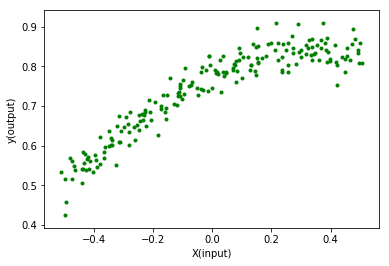

In [60]:
#Define a simple range of values for x and reshape so sklearn likes it.
np.random.seed(127)
x = np.linspace(0,1,200)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

# y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
y = np.cos(x)+0.8*x -0.5 
noise = np.random.normal(0,0.03, x.shape)
y = y + noise
x = x - 0.5

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.xlabel("X(input)")
plt.ylabel("y(output)")
plt.savefig("data_set.svg")

## Least Squares Method of Linear Regression

In [61]:
def regression(x,y):
    n = len(x)
    sy = np.sum(y)
    sx = np.sum(x)
    sx2 = np.sum(np.square(x))
    sxy = np.sum(x*y)

    # y = mx+c
    z = (n*sx2 - sx**2)
    m = (n*sxy - sx*sy)/z
#     c = (sy*sx2 - sx*sxy)/z
    c = (sy - m*sx)/n
    return m, c

def output(x, m, c):
    return m*x+c

def error(target, output): ### Root mean squared Error
    return np.sqrt(np.square(target-output).mean())

def error1(target, output): ### Mean Squared error
    return np.square(target-output).mean()

def error2(target, output): ### MODIFIED Mean Squared error
    return np.square(target-output).mean()/2

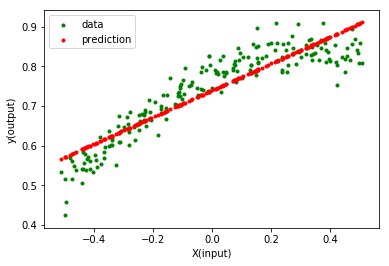

In [62]:
m, c = regression(x, y)
y_hat = output(x,m,c)
plt.scatter(x, y, marker='.', color='g', label='data')
plt.xlabel("X(input)")
plt.ylabel("y(output)")

plt.scatter(x, y_hat, marker='.', color='r', label='prediction')
# plt.plot(x, y_hat, color='r', lw=3)
plt.legend()
plt.savefig("regression.svg")

In [63]:
m, c

(0.33758044541891635, 0.7392967469060769)

In [65]:
min_err = error1(y, y_hat)
min_err

0.002033259000067874

In [68]:
error_analytical = error2(y, y_hat)
error_analytical

0.001016629500033937

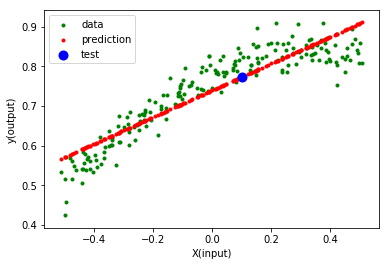

In [7]:
x_ = 0.1
y_ = output(x_, m, c)

plt.scatter(x, y, marker='.', color='g', label='data')
plt.xlabel("X(input)")
plt.ylabel("y(output)")

plt.scatter(x, y_hat, marker='.', color='r', label='prediction')
# plt.plot(x, y_hat, color='r', lw=3)

plt.scatter(x_, y_, marker='o', color='b', lw=4, label='test')

plt.legend()
plt.savefig("prediction.svg")

## Linear Regression using Linear Algebra

In [8]:
X = np.c_[x, np.ones(len(x))]
X

array([[-5.11436190e-01,  1.00000000e+00],
       [-4.97877661e-01,  1.00000000e+00],
       [-4.96808220e-01,  1.00000000e+00],
       [-4.94382395e-01,  1.00000000e+00],
       [-4.78697910e-01,  1.00000000e+00],
       [-4.74244456e-01,  1.00000000e+00],
       [-4.72743065e-01,  1.00000000e+00],
       [-4.66283541e-01,  1.00000000e+00],
       [-4.61482160e-01,  1.00000000e+00],
       [-4.40626730e-01,  1.00000000e+00],
       [-4.39722860e-01,  1.00000000e+00],
       [-4.36432260e-01,  1.00000000e+00],
       [-4.35201401e-01,  1.00000000e+00],
       [-4.31455943e-01,  1.00000000e+00],
       [-4.30720213e-01,  1.00000000e+00],
       [-4.24703862e-01,  1.00000000e+00],
       [-4.21818552e-01,  1.00000000e+00],
       [-4.18766566e-01,  1.00000000e+00],
       [-4.14045230e-01,  1.00000000e+00],
       [-4.12128676e-01,  1.00000000e+00],
       [-4.01444270e-01,  1.00000000e+00],
       [-3.96677108e-01,  1.00000000e+00],
       [-3.92256605e-01,  1.00000000e+00],
       [-3.

In [9]:
X.shape

(200, 2)

In [10]:
Y = y.reshape(-1,1) 
Y

array([[0.53438926],
       [0.51629986],
       [0.42496593],
       [0.45925837],
       [0.57017717],
       [0.56138495],
       [0.5162403 ],
       [0.54931814],
       [0.53872215],
       [0.54236475],
       [0.5049068 ],
       [0.54170092],
       [0.58505352],
       [0.55614032],
       [0.57850709],
       [0.5399376 ],
       [0.56625075],
       [0.57228923],
       [0.54084522],
       [0.56264595],
       [0.53427369],
       [0.57577737],
       [0.56505608],
       [0.54542747],
       [0.62066738],
       [0.55430813],
       [0.58486952],
       [0.56867479],
       [0.59541465],
       [0.63743643],
       [0.59979198],
       [0.60210566],
       [0.61935871],
       [0.61534057],
       [0.60102237],
       [0.55224352],
       [0.64954263],
       [0.67363593],
       [0.60860966],
       [0.60913077],
       [0.63772078],
       [0.64799462],
       [0.67110233],
       [0.65487129],
       [0.63568496],
       [0.60204426],
       [0.68585554],
       [0.647

In [11]:
Y.shape

(200, 1)

In [12]:
W = np.linalg.pinv(X) @ Y
W

array([[0.33758045],
       [0.73929675]])

In [13]:
W.shape

(2, 1)

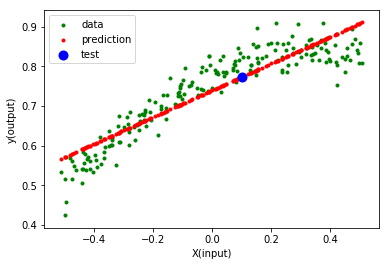

In [14]:
X_ = np.array([[0.1, 1]])
Y_ = X_ @ W

plt.scatter(x, y, marker='.', color='g', label='data')
plt.xlabel("X(input)")
plt.ylabel("y(output)")

plt.scatter(x, y_hat, marker='.', color='r', label='prediction')
# plt.plot(x, y_hat, color='r', lw=3)

plt.scatter(X_[0,0], Y_, marker='o', color='b', lw=4, label='test')

plt.legend()
plt.savefig("prediction2.svg")

## Linear Regression using Gradient descent

#### Random Search

In [15]:
y.min(), y.max()

(0.4249659335104705, 0.9089939763138148)

In [16]:
total = 100000
min_err = 999999
m_search = None
c_search = None
np.random.seed(127)
y_hat_search = None
for count in range(total):
    theta = np.random.uniform(low=0, high=np.pi)
    m_ = np.tan(theta)
    c_ = np.random.uniform(low=0.425, high=0.909)
    y_hat = output(x, m_, c_)
    err = error1(y, y_hat)
    if err < min_err:
        min_err = err
        m_search = m_
        c_search = c_
        y_hat_search = y_hat
m_search, c_search

(0.3334971844510733, 0.7387798805886701)

In [17]:
min_err

0.002034944595048707

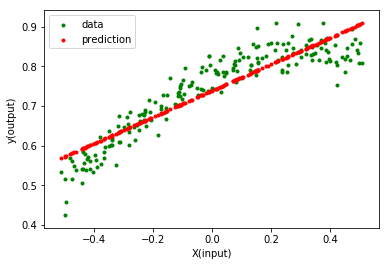

In [18]:
plt.scatter(x, y, marker='.', color='g', label='data')
plt.xlabel("X(input)")
plt.ylabel("y(output)")

plt.scatter(x, y_hat_search, marker='.', color='r', label='prediction')
plt.legend()
plt.savefig("regression_rs.svg")

### Gradient Descent Search

In [19]:
E = 1e10
Eprev = None

In [20]:
np.random.seed(129)
m = np.random.normal(loc=1)
c = np.random.uniform()
m,c

(-0.6288113779376896, 0.6052952376255275)

In [21]:
n = len(x)
alpha = 0.1
epsilon = 1e-10

In [22]:
from matplotlib.animation import ImageMagickWriter

step =  0
Error =  0.04972084805997066

step =  10
Error =  0.035593881242700076

step =  20
Error =  0.029375314821942382

step =  30
Error =  0.02482521667564405

step =  40
Error =  0.02107390796030633

step =  50
Error =  0.017922049946890464

step =  60
Error =  0.015266504538483732

step =  70
Error =  0.013028222890661315

step =  80
Error =  0.011141531675337952

step =  90
Error =  0.009551189633579996

step =  100
Error =  0.00821064655519905

step =  110
Error =  0.007080665702435572

step =  120
Error =  0.006128173551955377

step =  130
Error =  0.005325291540477517

step =  140
Error =  0.004648520058040575

step =  150
Error =  0.004078050632986222

step =  160
Error =  0.003597186156023443

step =  170
Error =  0.00319185217132651

step =  180
Error =  0.002850184930302495

step =  190
Error =  0.0025621841507077344

step =  200
Error =  0.0023194203176911538

step =  210
Error =  0.0021147879597377224

step =  220
Error =  0.0019422976781284297

step =  230
Error =  0.

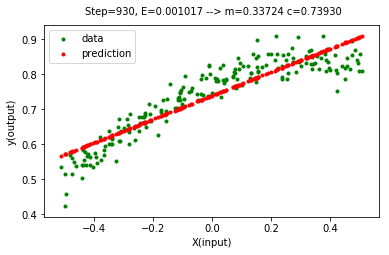

In [23]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
# fig.set_animated(True)

val_list = []
writer = ImageMagickWriter(fps=10)

with writer.saving(fig, "regression_gd_anim.gif", 100):
    for step in range(10000000):
        #### Set Previous error
        Eprev = E    
        #### calculating output
        y_hat = output(x, m, c)
        #### calculating error
        E = error2(y, y_hat)

        #### calculating gradients
        dy = y_hat - y
        dm = (dy*x).sum()/n
        dc = dy.sum()/n

        m = m - alpha*dm
        c = c - alpha*dc
        
        val_list.append((E,m,c))

        if step%10 == 0:
            print("step = ",step)
            print("Error = ", E)

            ax.clear()
            plt.xlim((-0.5679472377938085, 0.5638641593022863))
            plt.ylim((0.39317623114955275, 0.9407836786747326))
            plt.xlabel("X(input)")
            plt.ylabel("y(output)")
            plt.scatter(x, y, marker='.', color='g', label='data')
            plt.scatter(x, y_hat, marker='.', color='r', label='prediction')
            plt.text(-0.43,0.97,f'Step={step}, E={E:.6f} --> m={m:.5f} c={c:.5f}')
            plt.legend()


            fig.canvas.draw()
            plt.pause(0.01)
            print()
            writer.grab_frame()

            if Eprev-E < epsilon:
                print('Optimized to our threshold')
                plt.pause(2)
                print(plt.xlim(), plt.ylim())
                break

In [24]:
m,c

(0.3372410605496891, 0.7392967485314282)

In [25]:
y_hat = output(x, m, c)
#### calculating mean squared error
error1(y, y_hat), error2(y, y_hat)

(0.002033268798966577, 0.0010166343994832884)

In [26]:
val_mat = np.array(val_list)
val_mat.shape

(931, 3)

In [31]:
num_points = 100
mgM = np.linspace(-0.8, 1.2, num_points)
mgC = np.linspace(0.4, 1, num_points)

In [32]:
mgM.shape , mgC.shape

((100,), (100,))

In [33]:
mgM, mgC = np.meshgrid(mgM, mgC)

In [34]:
mgE = np.array([error2(y, output(x, mgm, mgc)) \
                for mgm, mgc in zip(np.ravel(mgM), np.ravel(mgC))]).reshape(mgM.shape)

In [35]:
mgE.shape

(100, 100)

In [36]:
from mpl_toolkits.mplot3d import Axes3D
# matplotlib.rcParams['figure.figsize'] = (12, 8)

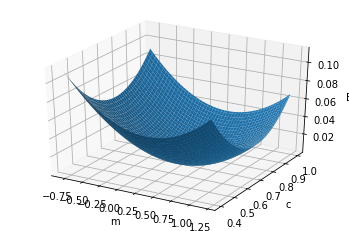

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(mgM, mgC, mgE)
ax.set_xlabel('m')
ax.set_ylabel('c')
ax.set_zlabel('E')

plt.show()

In [48]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')

#set initial viewing angles
azimuth, elev = -36, 41
ax.view_init(elev, azimuth )

with writer.saving(fig, "error_surface_gd.gif", 100):
    for step in range(len(val_mat)):
        if step%10 == 0:
            ax.clear()

            ax.plot_surface(mgM, mgC, mgE, cmap='hot', alpha=0.7)
#             ax.plot_wireframe(mgM, mgC, mgE, cmap='hot', alpha=0.9, edgecolor='gray')
            ax.scatter(val_mat[step,1],val_mat[step,2], val_mat[step,0], c='g', lw=3)
            ax.plot(xs=val_mat[:step,1], ys=val_mat[:step,2], zs=val_mat[:step,0],c='orange', lw=2)
            ax.set_xlabel('m')
            ax.set_ylabel('c')
            ax.set_zlabel('E')
            E_, m_, c_ = val_mat[step,0], val_mat[step,1],val_mat[step,2]
            ax.text(-0.85,0.4,0.15,f'Step={step}, E={E_:.6f} --> m={m_:.5f} c={c_:.5f}')
            

            writer.grab_frame()
            fig.canvas.draw()
            plt.pause(0.01)

In [27]:
errs = val_mat[:,0]

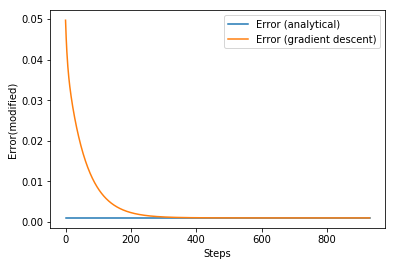

In [74]:
%matplotlib inline
plt.xlabel("Steps")
plt.ylabel("Error(modified)")
plt.plot([0, len(errs)], [error_analytical, error_analytical], label="Error (analytical)")
plt.plot(errs, label="Error (gradient descent)")
plt.legend()

plt.savefig("error_plot_step.svg")

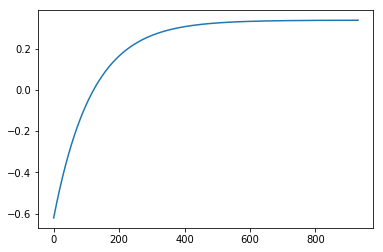

In [29]:
plt.plot(val_mat[:,1]) ## This is the slope value wrt steps

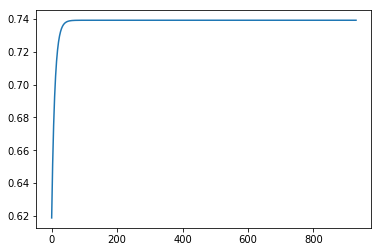

In [30]:
plt.plot(val_mat[:,2]) ## This is the y-intercept value wrt steps